# Time Series Data Validation Demo

## 1. Introduction

The Time Series Data Validation Demo notebook aims to demonstrate the application of various data validation tests using the **ValidMind MRM Platform** and **Developer Framework**. Ensuring the quality and an a robust exploratory data analysis of time series data is essential for accurate model predictions and robust decision-making processes.

In this demo, we will walk through different **data validation suites of tests** tailored for time series data, showcasing how these tools can assist you in identifying potential issues and inconsistencies in the data. 



## 2. Setup 

Prepare the environment for our analysis. First, **import** all necessary libraries and modules required for our analysis. Next, **connect** to the ValidMind MRM platform, which provides a comprehensive suite of tools and services for model validation.

Finally, define and **configure** the specific use case we are working on by setting up any required parameters, data sources, or other settings that will be used throughout the analysis. 

### Import Libraries

In [13]:
# Load API key and secret from environment variables
%load_ext dotenv
%dotenv .env

# System libraries
import glob
import os

# ML libraries
import pandas as pd

# ValidMind libraries 
import validmind as vm
from validmind.datasets.regression import lending_club
from validmind.datasets.regression import (
    lending_club,
    fred,
    identify_frequencies, 
    resample_to_common_frequency
)

The dotenv extension is already loaded. To reload it, use:
  %reload_ext dotenv


### Connect to the ValidMind Library

In [14]:
vm.init(
  api_host = "http://localhost:3000/api/v1/tracking",
  project = "clhhz04x40000wcy6shay2oco"
)

Connected to ValidMind. Project: Customer Churn Model - Initial Validation (clhhz04x40000wcy6shay2oco)


### Configure Your Use Case

In [15]:
dataset = 'fred'

if dataset == 'lending_club':
    target_column = ['loan_rate_A']
    feature_columns = ['loan_rate_B', 'loan_rate_C', 'loan_rate_D']
    common_frequency = 'MS'
    split_option = 'train_test'
    df = lending_club.load_data()
    
    # Split the dataset into test and training 
    train_df, test_df = lending_club.preprocess(df, split_option=split_option, train_size=0.8, test_size=0.2)

if dataset == 'fred':
    target_column = ['MORTGAGE30US']
    feature_columns = ['FEDFUNDS', 'GS10', 'UNRATE']
    common_frequency = 'MS'
    split_option = 'train_test'
    df = fred.load_data()
    selected_cols = target_column + feature_columns
    df = df[selected_cols]
    
    # Split the dataset into test and training
    train_df, test_df = fred.preprocess(df, split_option=split_option, train_size=0.8, test_size=0.2)
    


### Find All Test Plans Available in the Developer Framework

We can find all the test plans available in the developer framework by calling the following functions:

- All test plans: `vm.test_plans.list_plans()`
- Describe a test plan: `vm.test_plans.describe_plan("time_series_data_quality")`
- List all available tests: `vm.test_plans.list_tests()`

In [25]:
vm.test_plans.list_plans()

ID,Name,Description
binary_classifier_metrics,BinaryClassifierMetrics,Test plan for sklearn classifier metrics
binary_classifier_validation,BinaryClassifierPerformance,Test plan for sklearn classifier models
binary_classifier_model_diagnosis,BinaryClassifierDiagnosis,Test plan for sklearn classifier model diagnosis tests
binary_classifier,BinaryClassifier,Test plan for sklearn classifier models that includes both metrics and validation tests
tabular_dataset,TabularDataset,Test plan for generic tabular datasets
tabular_dataset_description,TabularDatasetDescription,Test plan to extract metadata and descriptive statistics from a tabular dataset
tabular_data_quality,TabularDataQuality,Test plan for data quality on tabular datasets
normality_test_plan,NormalityTestPlan,Test plan to perform normality tests.
autocorrelation_test_plan,AutocorrelationTestPlan,Test plan to perform autocorrelation tests.
seasonality_test_plan,SesonalityTestPlan,Test plan to perform seasonality tests.


## 3. Data Description

In [16]:
d]{p;l,/;.l/.,isplay(df)

,MORTGAGE30US,FEDFUNDS,GS10,UNRATE
DATE,,,,
1947-01-01,NaN,NaN,NaN,NaN
1947-02-01,NaN,NaN,NaN,NaN
1947-03-01,NaN,NaN,NaN,NaN
1947-04-01,NaN,NaN,NaN,NaN
1947-05-01,NaN,NaN,NaN,NaN
...,...,...,...,...
2023-04-01,NaN,NaN,3.46,NaN
2023-04-06,6.28,NaN,NaN,NaN
2023-04-13,6.27,NaN,NaN,NaN


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3551 entries, 1947-01-01 to 2023-04-27
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MORTGAGE30US  2718 non-null   float64
 1   FEDFUNDS      825 non-null    float64
 2   GS10          841 non-null    float64
 3   UNRATE        903 non-null    float64
dtypes: float64(4)
memory usage: 267.8 KB


## 4. Data Quality

#### **Run Data Quality Test Plan**

We will now run the default data quality test plan that will execute a suite of data quality tests such as:

- Frequency missmatches 
- Missing values
- Outliers

ValidMind evaluates if the data quality metrics are within expected ranges. These thresholds or ranges can be further configured by model validators.

In [19]:
vm.test_plans.describe_plan("time_series_data_quality")

Attribute,Value
ID,time_series_data_quality
Name,TimeSeriesDataQuality
Description,Test plan for data quality on time series datasets
Required Context,['dataset']
Tests,"TimeSeriesOutliers (ThresholdTest), TimeSeriesMissingValues (ThresholdTest), TimeSeriesFrequency (ThresholdTest)"
Test Plans,[]


Pandas dataset detected. Initializing VM Dataset instance...
Inferring dataset types...


Running ThresholdTest: time_series_outliers:   0%|          | 0/3 [00:00<?, ?it/s]  

   Variable   z-score  Threshold       Date
0  FEDFUNDS  3.707038          3 1981-05-01



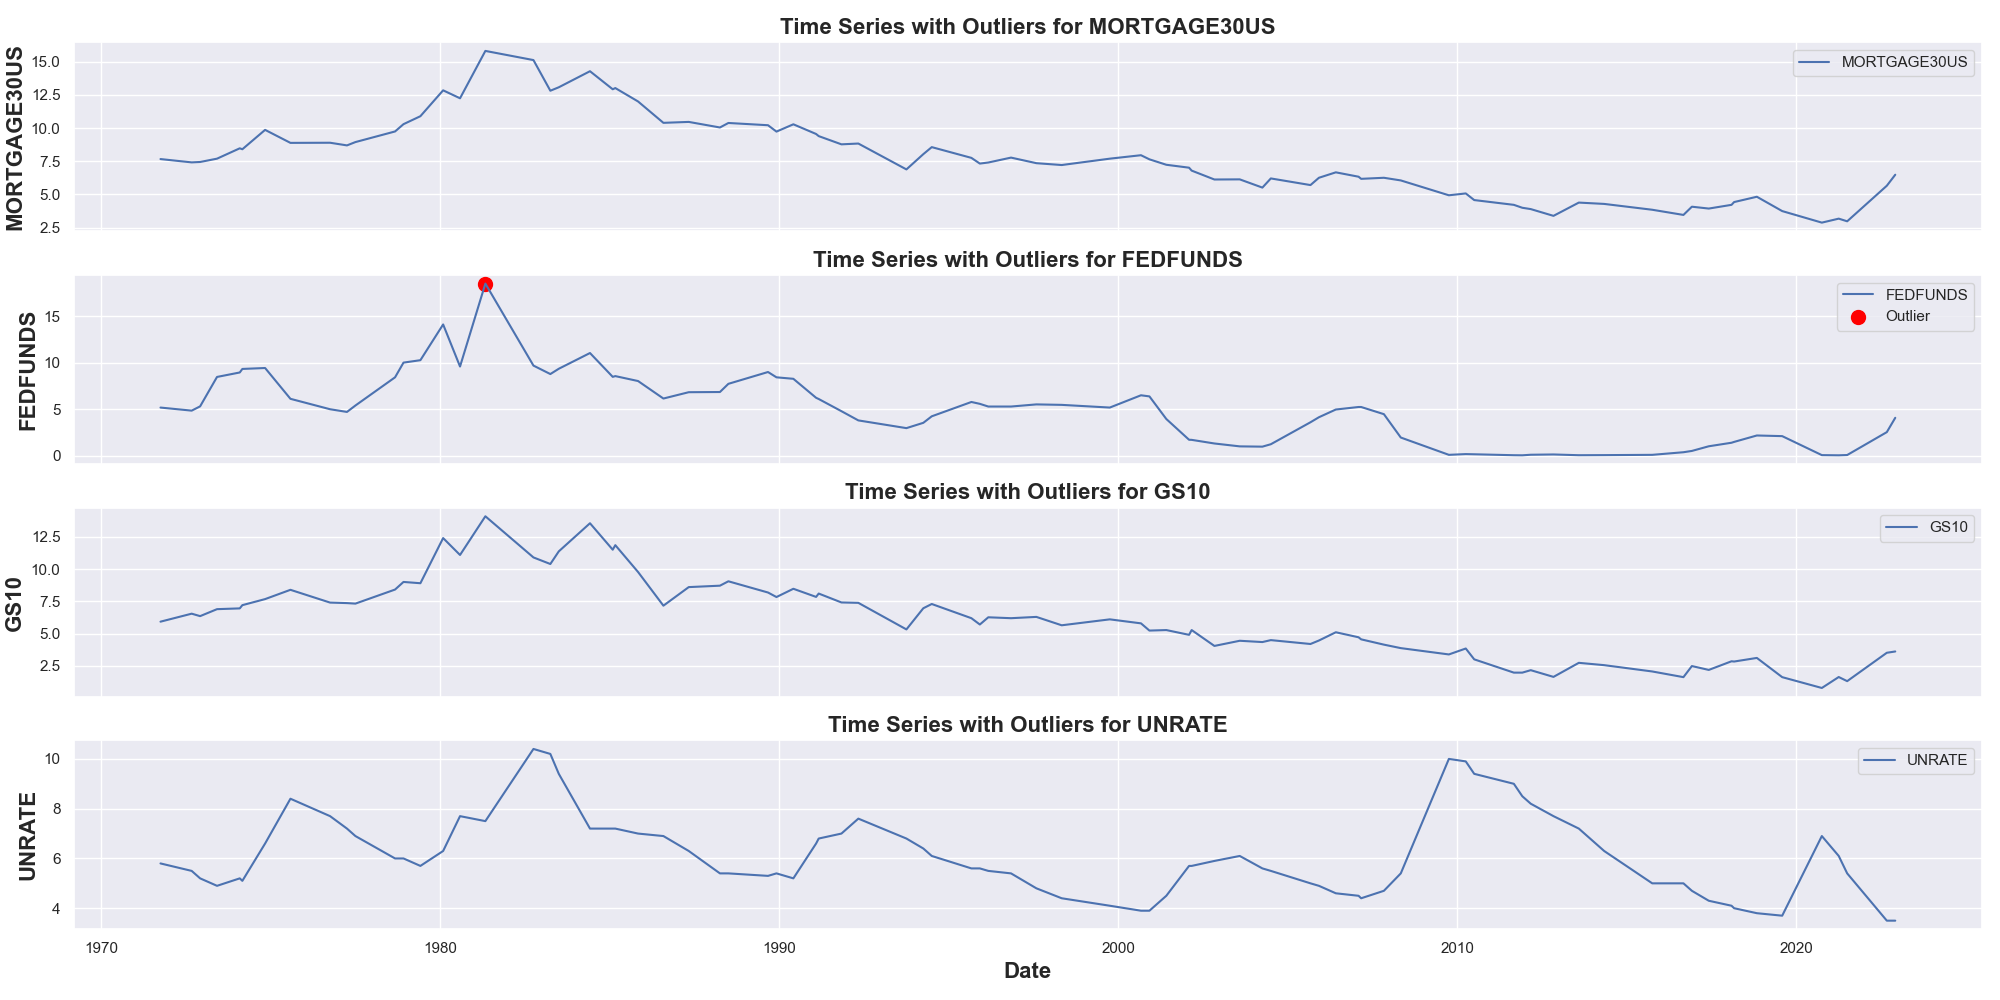
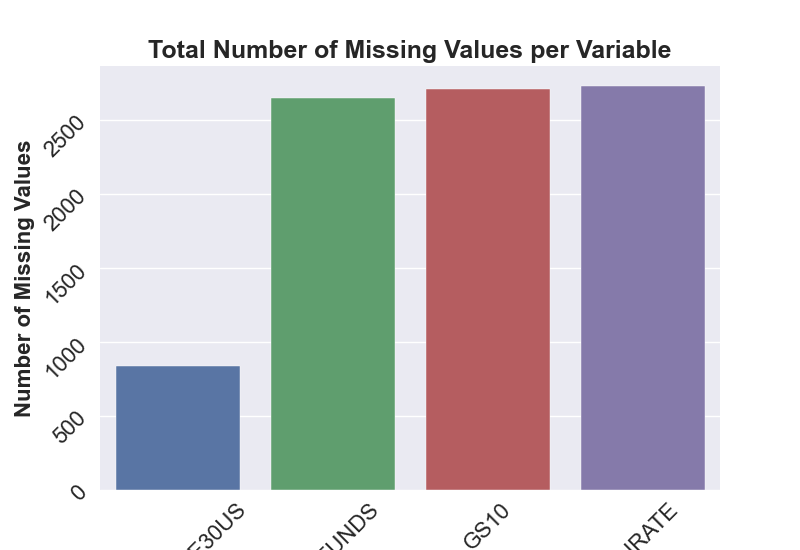
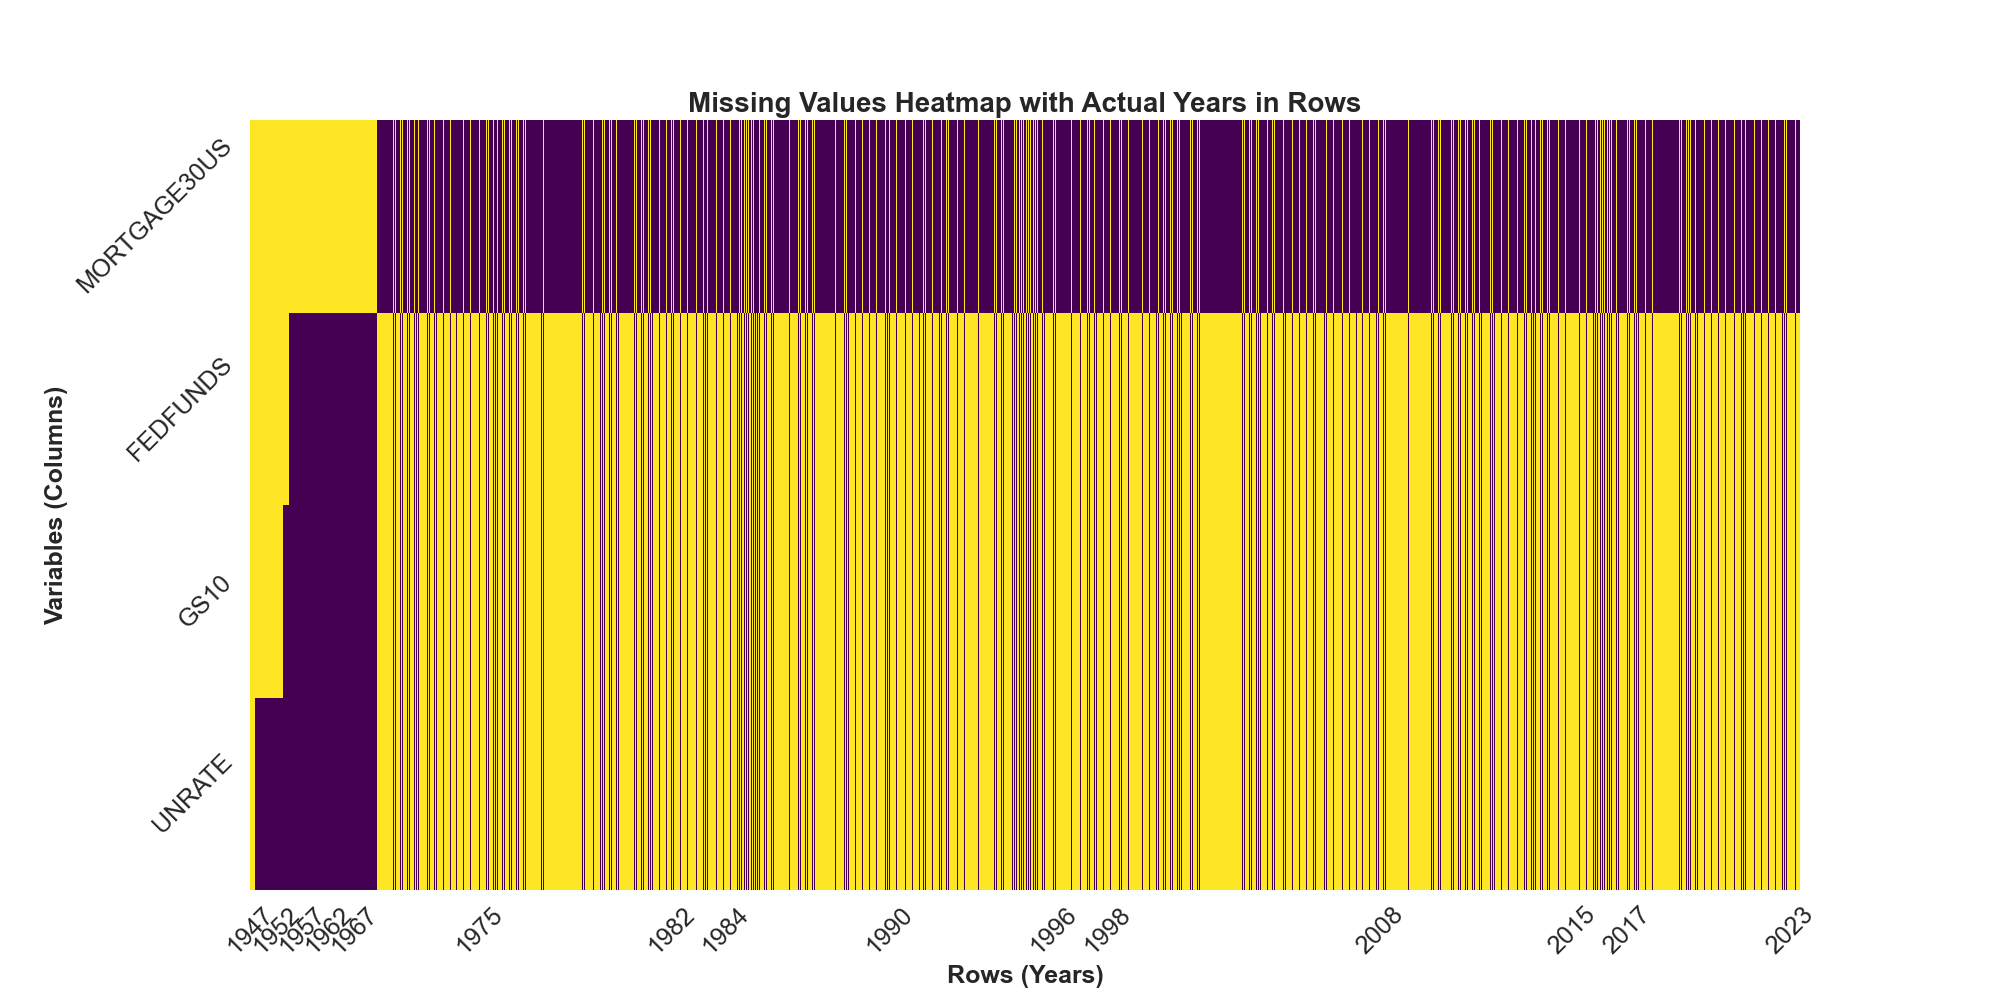
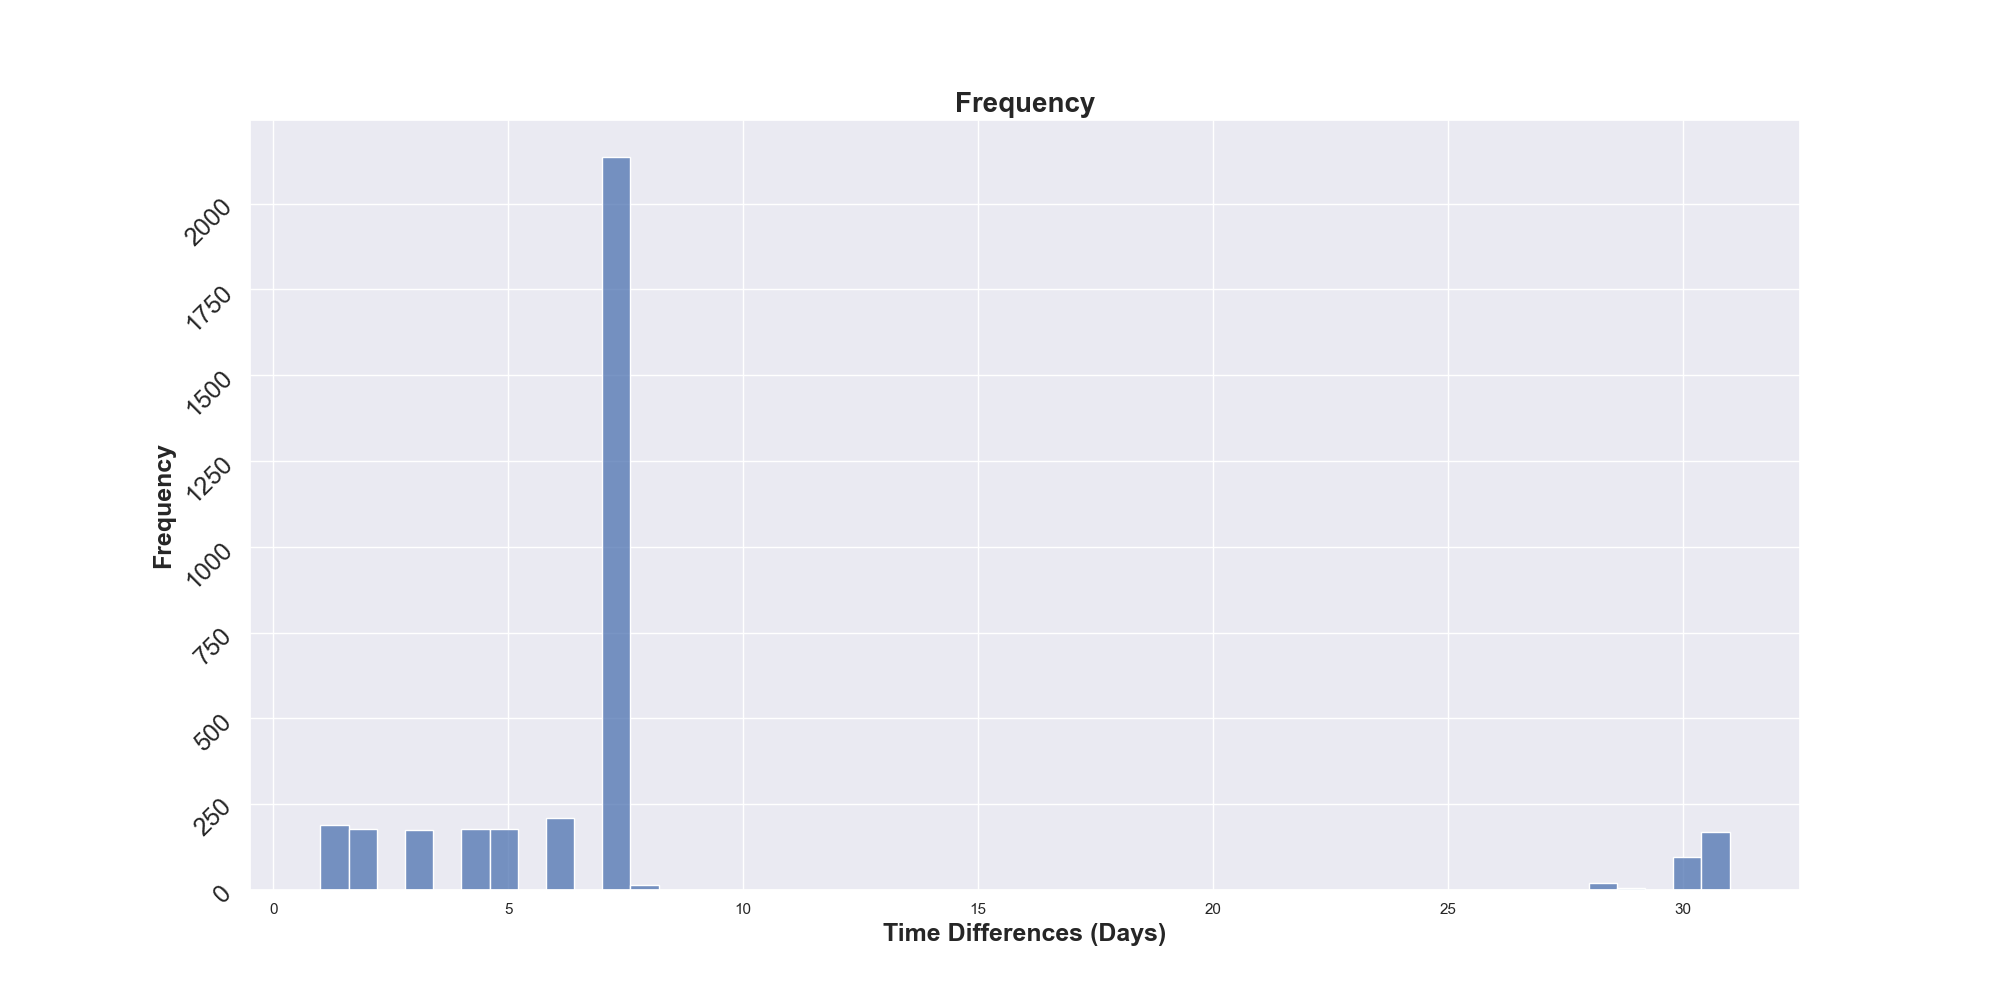

TimeSeriesDataQuality(test_context=TestContext(dataset=Dataset(raw_dataset=            MORTGAGE30US  FEDFUNDS  GS10  UNRATE
DATE                                            
1947-01-01           NaN       NaN   NaN     NaN
1947-02-01           NaN       NaN   NaN     NaN
1947-03-01           NaN       NaN   NaN     NaN
1947-04-01           NaN       NaN   NaN     NaN
1947-05-01           NaN       NaN   NaN     NaN
...                  ...       ...   ...     ...
2023-04-01           NaN       NaN  3.46     NaN
2023-04-06          6.28       NaN   NaN     NaN
2023-04-13          6.27       NaN   NaN     NaN
2023-04-20          6.39       NaN   NaN     NaN
2023-04-27          6.43       NaN   NaN     NaN

[3551 rows x 4 columns], fields=[{'id': 'MORTGAGE30US', 'type': 'Numeric'}, {'id': 'FEDFUNDS', 'type': 'Numeric'}, {'id': 'GS10', 'type': 'Numeric'}, {'id': 'UNRATE', 'type': 'Numeric'}], sample=[{'id': 'head', 'data': [{'MORTGAGE30US': nan, 'FEDFUNDS': nan, 'GS10': nan, 'UNRATE': nan},

In [20]:
vm_dataset = vm.init_dataset(
    dataset=df
)

config={
    "time_series_outliers": {
        "zscore_threshold": 3,

    },
    "time_series_missing_values":{
        "min_threshold": 2,
    }
}

vm.run_test_plan("time_series_data_quality", dataset=vm_dataset, config=config)

Identify the frequencies of each variable in the raw dataset.

In [22]:
frequencies = identify_frequencies(df)
display(frequencies)

,Variable,Frequency
0,MORTGAGE30US,None
1,FEDFUNDS,Monthly
2,GS10,Monthly
3,UNRATE,Monthly


Handle frequencies by resampling all variables to a common frequency.

In [21]:
preprocessed_df = resample_to_common_frequency(df, common_frequency=common_frequency)
frequencies = identify_frequencies(preprocessed_df)
display(frequencies)

,Variable,Frequency
0,MORTGAGE30US,Monthly
1,FEDFUNDS,Monthly
2,GS10,Monthly
3,UNRATE,Monthly


Run Data Quality Test Plan again this time with the resampled dataset `preprocessed_df` and same configuration.     

In [ ]:
vm_dataset = vm.init_dataset(
    dataset=preprocessed_df
)
vm.run_test_plan("time_series_data_quality", dataset=vm_dataset, config=config)

Handle the missing values by droping all the `nan` values. 

In [23]:
preprocessed_df = preprocessed_df.dropna()

Run Data Quality Test Plan again to check there are no missin values and frequencies of all variables are the same.

Pandas dataset detected. Initializing VM Dataset instance...
Inferring dataset types...


Running ThresholdTest: time_series_outliers:   0%|          | 0/3 [00:00<?, ?it/s]  

   Variable   z-score  Threshold       Date
0  FEDFUNDS  3.092125          3 1980-03-01
1  FEDFUNDS  3.197478          3 1980-04-01
2  FEDFUNDS  3.521060          3 1980-12-01
3  FEDFUNDS  3.566211          3 1981-01-01
4  FEDFUNDS  3.425741          3 1981-05-01
5  FEDFUNDS  3.571228          3 1981-06-01
6  FEDFUNDS  3.556178          3 1981-07-01
7  FEDFUNDS  3.250154          3 1981-08-01
8    UNRATE  4.986355          3 2020-04-01
9    UNRATE  4.107648          3 2020-05-01



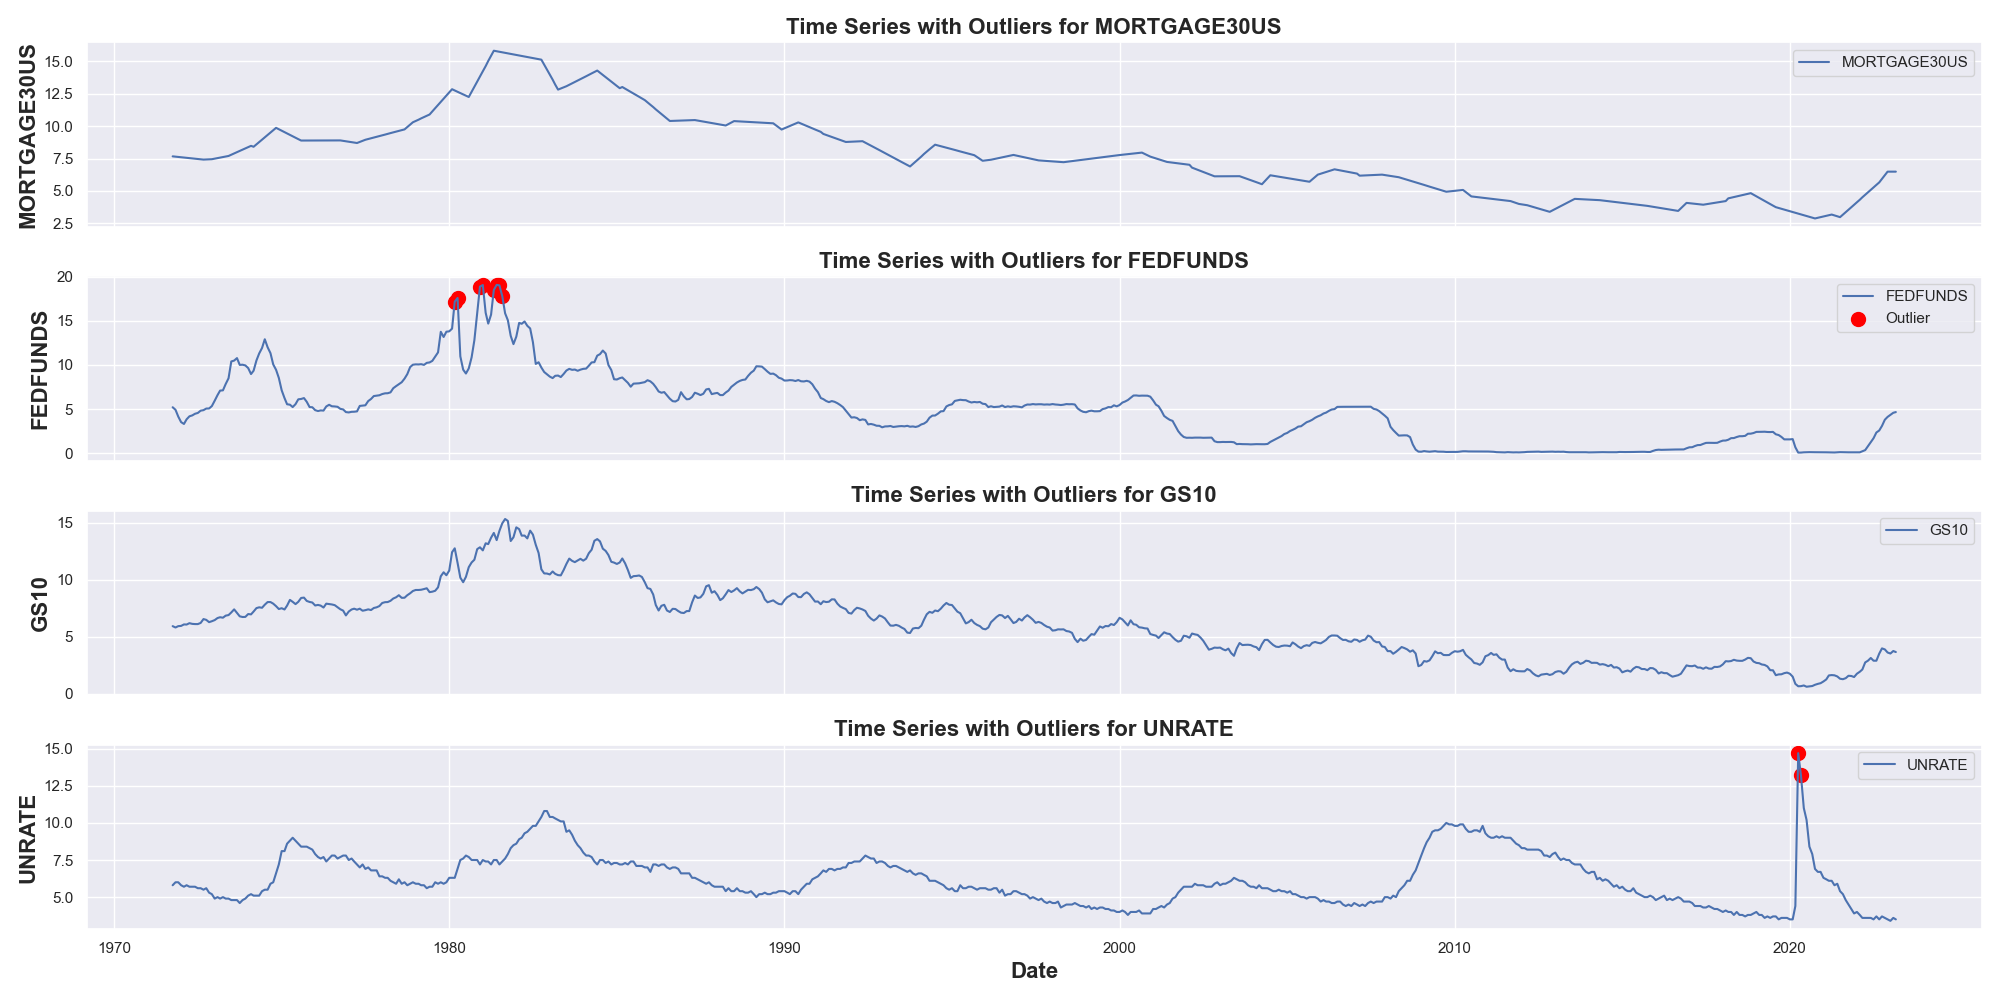
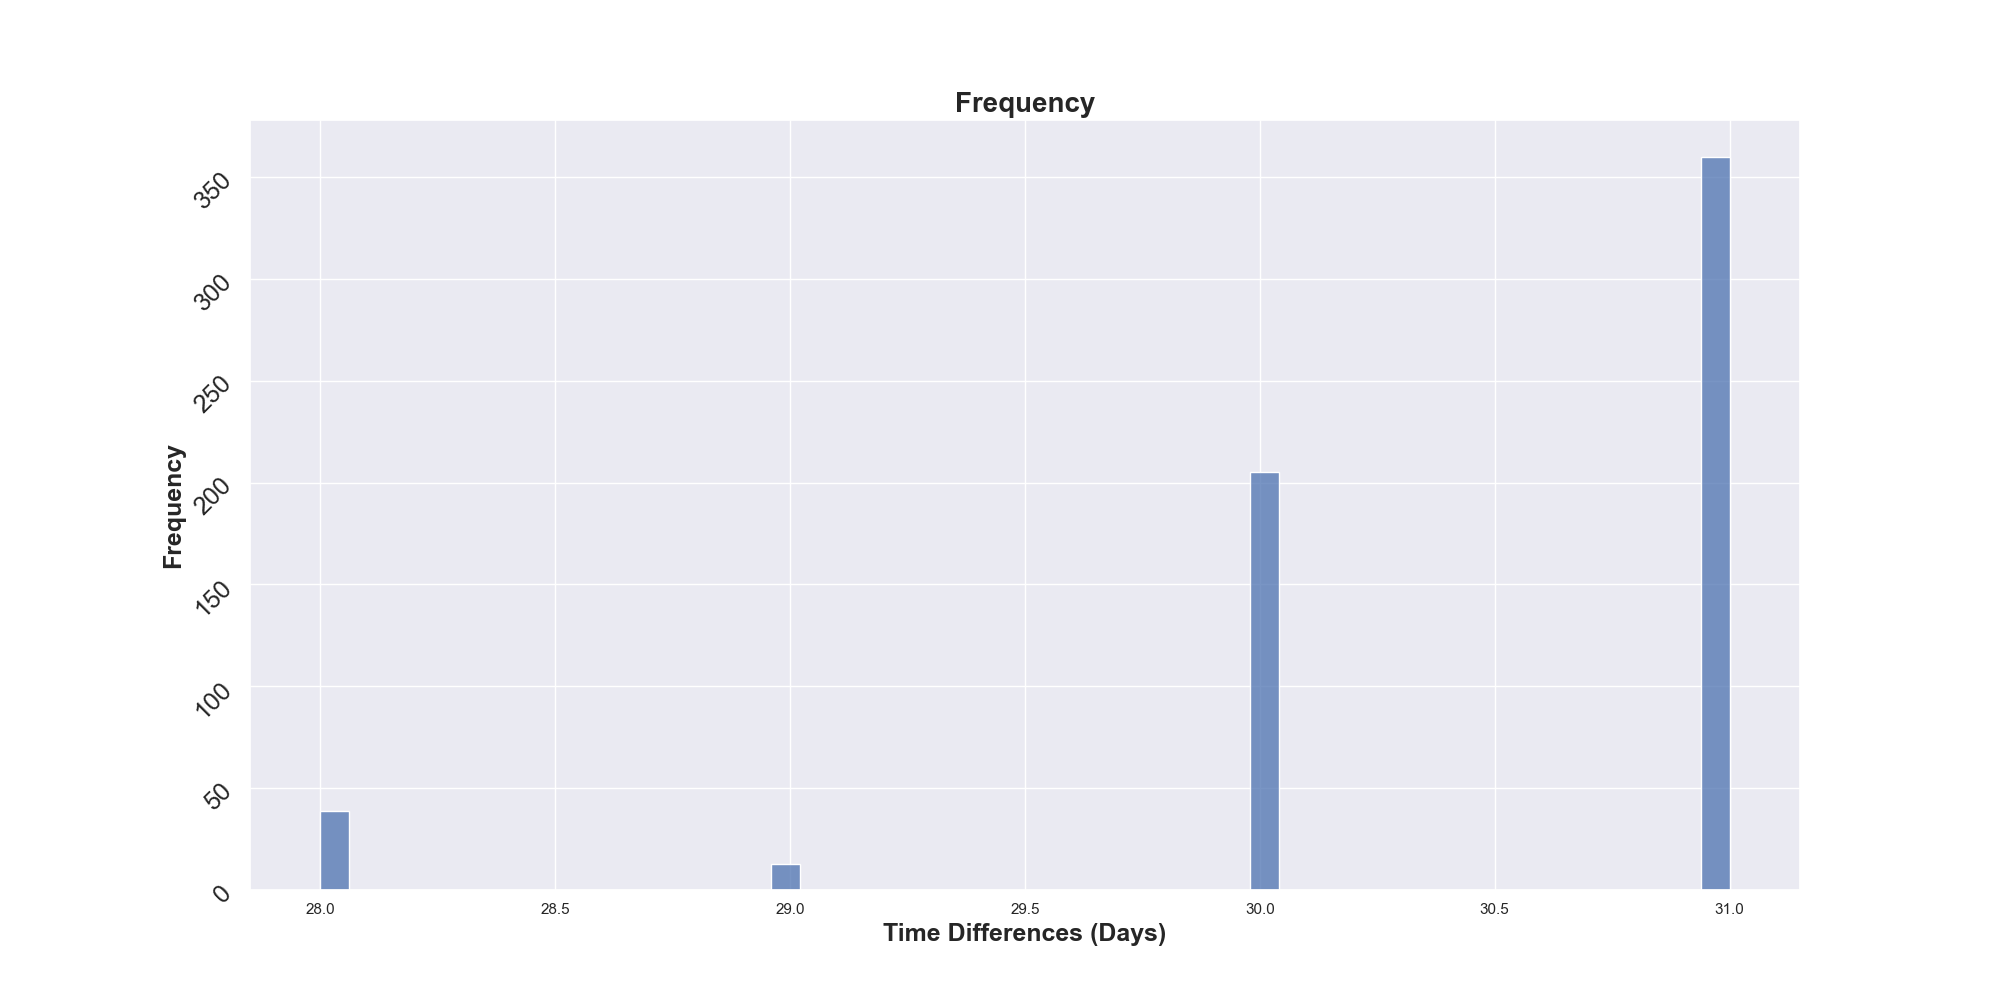

TimeSeriesDataQuality(test_context=TestContext(dataset=Dataset(raw_dataset=            MORTGAGE30US  FEDFUNDS  GS10  UNRATE
DATE                                            
1971-10-01      7.670000      5.20  5.93     5.8
1971-11-01      7.647273      4.91  5.81     6.0
1971-12-01      7.624545      4.14  5.93     6.0
1972-01-01      7.601818      3.51  5.95     5.8
1972-02-01      7.579091      3.30  6.08     5.7
...                  ...       ...   ...     ...
2022-11-01      6.213333      3.78  3.89     3.6
2022-12-01      6.490000      4.10  3.62     3.5
2023-01-01      6.490000      4.33  3.53     3.4
2023-02-01      6.490000      4.57  3.75     3.6
2023-03-01      6.490000      4.65  3.66     3.5

[618 rows x 4 columns], fields=[{'id': 'MORTGAGE30US', 'type': 'Numeric'}, {'id': 'FEDFUNDS', 'type': 'Numeric'}, {'id': 'GS10', 'type': 'Numeric'}, {'id': 'UNRATE', 'type': 'Numeric'}], sample=[{'id': 'head', 'data': [{'MORTGAGE30US': 7.67, 'FEDFUNDS': 5.2, 'GS10': 5.93, 'UNRATE': 5.8}

In [24]:
vm_dataset = vm.init_dataset(
    dataset=preprocessed_df
)
vm.run_test_plan("time_series_data_quality", dataset=vm_dataset, config=config)

## 5. Exploratory Data Analysis

### Univariate Analysis

#### **Run Time Series Univariate Test Plan**

In [ ]:
vm.test_plans.describe_plan("time_series_univariate")

In [ ]:
test_plan_config = {
    "time_series_line_plot": {
        "columns": target_column + feature_columns
    },
    "time_series_histogram": {
        "columns": target_column + feature_columns
    },
    "acf_pacf_plot": {
        "columns": target_column + feature_columns
    },
    "auto_ar": {
        "max_ar_order": 3
    },
    "auto_ma": {
        "max_ma_order": 3
    },
    "seasonal_decompose": {
        "seasonal_model": 'additive',
         "fig_size": (40,30)
    },
    "auto_seasonality": {
        "min_period": 1,
        "max_period": 3
    },
      "auto_stationarity": {
        "max_order": 3,
        "threshold": 0.05
    },
      "rolling_stats_plot": {
        "window_size": 12    
    },
}

vm_dataset = vm.init_dataset(
    dataset=preprocessed_df
)
vm.run_test_plan("time_series_univariate", config=test_plan_config, dataset=vm_dataset)

### Multivariate Analysis

#### **Run Time Series Multivariate Test Plan**

In [ ]:
vm.test_plans.describe_plan("time_series_multivariate")

In [ ]:
test_plan_config = {
    "scatter_plot": {
        "columns": target_column + feature_columns
    },
    "lagged_correlation_heatmap": {
        "target_col": target_column,
        "independent_vars": feature_columns
    },
    "engle_granger_coint": {
        "threshold": 0.05
    },
}

vm.run_test_plan("time_series_multivariate", config=test_plan_config, dataset=vm_dataset)